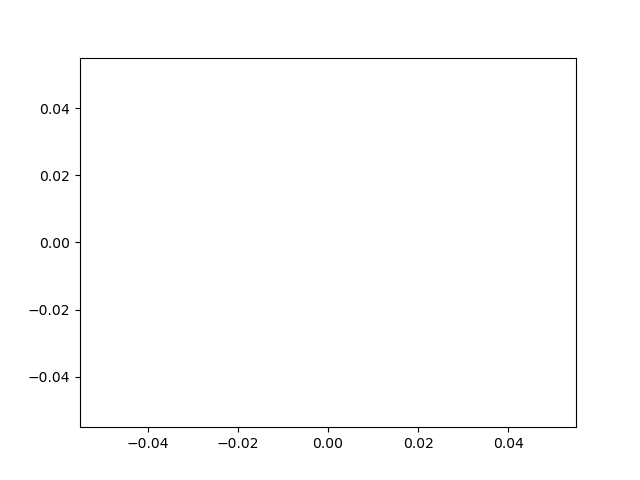

In [1]:
%matplotlib ipympl
# Some basic imports that are useful
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = ax.plot([], [], 'y')
def init():
    ax.set_xlim(-1.2, 1.2) #setting the limits of x and y axes
    ax.set_ylim(-1.2, 1.2)
    return ln,

- Here necessary libraries are imported
- Magic command above is used to enable interactivity in the Jupyterlab interface

In [2]:
def polygon(m):
    t=1680
    n=t//m
    vert=[]
    x=[]
    y=[]
    for i in range(m):
        vert.append([np.cos((i*2*np.pi)/m),np.sin((i*2*np.pi)/m)])
    vert.append(vert[0])
    for k in range(len(vert)-1):
        x.append(np.linspace(vert[k][0],vert[k+1][0],n))
        y.append(np.linspace(vert[k][-1],vert[k+1][-1],n))
    xt=np.concatenate(x)
    yt=np.concatenate(y)
    return xt,yt

- Here I defined a polygon function to create arrays of x and y co ordinates of 'm' sided polygon.
- In the presentation given, every polygon fits into a unique circle.
- So, initially I found the coordinates of n sided polygon by a formula
- i.e., An n sided polygon has n vertices located at (cos(2pik/n),sin(2pik/n)) where k varies from 0 to n-1
- Each side is defined by the adjacent vertices and a side connecting the last and fist vertices.
- In order to cover all the sides, I added the first vertex at the end of the list and using linspace I found the t/m points/ coordinates for each side of an m sided polygon.
- The list of x and y are returned.

In [3]:
def morph(x1, y1, x2, y2, alpha):
    xm = alpha * x1 + (1-alpha) * x2
    ym = alpha * y1 + (1-alpha) * y2
    return xm, ym

- 'morph' function is used to convert one image to another image by creating a seires of images in between the original and target images, So that they can be viewed as animation.

In [4]:
def update(frame):
    if frame>=0 and frame<1:
        x1,y1=polygon(4)
        x2,y2=polygon(3)
        xdata,ydata=morph(x1,y1,x2,y2,frame)
    if frame>=1 and frame<2:
        x1,y1=polygon(5)
        x2,y2=polygon(4)
        xdata,ydata=morph(x1,y1,x2,y2,frame-1)
    if frame>=2 and frame<3:
        x1,y1=polygon(6)
        x2,y2=polygon(5)
        xdata,ydata=morph(x1,y1,x2,y2,frame-2)
    if frame>=3 and frame<4:
        x1,y1=polygon(7)
        x2,y2=polygon(6)
        xdata,ydata=morph(x1,y1,x2,y2,frame-3)
    if frame>=4 and frame<5:
        x1,y1=polygon(8)
        x2,y2=polygon(7)
        xdata,ydata=morph(x1,y1,x2,y2,frame-4)
    if frame>= 5 and frame<6:
        x1,y1=polygon(7)
        x2,y2=polygon(8)
        xdata,ydata=morph(x1,y1,x2,y2,frame-5)
    if frame>=6 and frame<7:
        x1,y1=polygon(6)
        x2,y2=polygon(7)
        xdata,ydata=morph(x1,y1,x2,y2,frame-6)
    if frame>=7 and frame<8:
        x1,y1=polygon(5)
        x2,y2=polygon(6)
        xdata,ydata=morph(x1,y1,x2,y2,frame-7)
    if frame>=8 and frame<9:
        x1,y1=polygon(4)
        x2,y2=polygon(5)
        xdata,ydata=morph(x1,y1,x2,y2,frame-8)  
    if frame>=9 and frame<=10:
        x1,y1=polygon(3)
        x2,y2=polygon(4)
        xdata,ydata=morph(x1,y1,x2,y2,frame-9)
    ln.set_data(xdata,ydata)
    return ln,

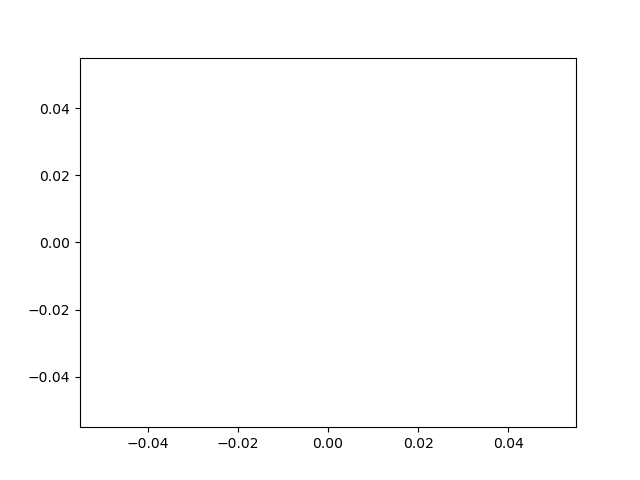

In [5]:
animate = FuncAnimation(fig, update, frames=np.linspace(0, 10, 256),init_func=init, blit=True, interval=100, repeat=True)
plt.show()

In [12]:
animate.save('EE21B066_animation.gif',fps=60)

- animate.save() function is used to save the animation and fps is nothing but frames per second

- As we need to animate 3 to 8 sided polygon and again 8 to 3 back, So I used 11 frames (ranging from 0 to 10) to morph and update.
- For example : when frame changes from 0 to 1, 3 sided polygon changes to 4 sided polygon
- Similarly when frame changes from 5 to 6, 8 sided polygon changes to 7 sided polygon.
- We are obtaining the xdata, ydata by passing the required matrices to the morph function.
- The data is set to ln and return ln,

- Finally, we use FuncAnimation function to animate the update function in fig plot by calling the function repeatedly.
- fig : figure object used to get needed events
- func (update) : This is the function to call at each frame.
- frames : Source of data to pass func(update) and each frame of animation.
- init_func : Afunction used to draw a clear frame. If not given, the results from the first item in the frames sequence will be used. This function will be called once before the first frame.
- If blit == True, init_func must return an iterable of artists to be re-drawn. This information is used by the blitting algorithm to determine which parts of the figure have to be updated. The return value is unused if blit == False and may be omitted in that case.
- interval : int default : 200
           : delay between frames in milliseconds
- repeat: bool, default: True
                      :Whether the animation repeats when the sequence of frames is completed.
- blit :bool, default: False
                   : Whether blitting is used to optimize drawing. Note: when using blitting, any animated artists will be drawn according to their zorder; however, they will be drawn on top of any previous artists, regardless of their zorder.

###### NOTE:
- First import the libraries which u require.
- Run the user defined function before you use it in some other cell.

- This is an .ipynb file, which we can run in Jupyter notebook or Jupyter lab.
- In Jupyter lab, we need to upload this document to the workspace and start editting and running.
- In jupyter notebook, which is a local host of our pc, we need to know where the file is located, opening this file is same as we do in file manager.
- To open in jupyter notebook, first we need to unzip the file i.e., extract all the files from it and open the ipynb file.